IMPORT LIBRARIES

In [46]:
# Dataframe
import pandas as pd

# Maptplolib
import matplotlib.pyplot as plt 

#Numpy
import numpy as np 
import pickle
# Seaborn
import seaborn as sns 

# Scikit-learn
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

IMPORT DATA

In [2]:
df = pd.read_csv('/content/news-data.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
df.shape

(2225, 2)

In [4]:
# Check for nulll values
df.isnull().sum()

category    0
text        0
dtype: int64

In [5]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

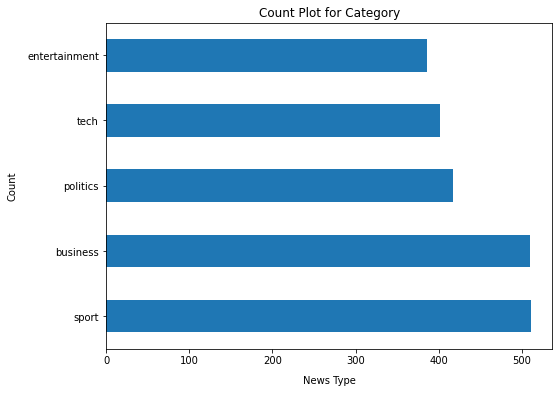

In [6]:
df['category'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("News Type", labelpad=10)
plt.ylabel("Count", labelpad=10)
plt.title("Count Plot for Category");

DATA CLEANING AND PREPROCESSING

In [7]:
#Data cleaning and preprocessing
#Regular Expressions for cleaning the text
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#Object for porterstem
ps = PorterStemmer()

corpus = []          #after the cleaning we have to store the sentence in perticular list

for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df.text[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer  # Convert a collection of text documents to a matrix of token counts
CountVectorizer = CountVectorizer()
##CountVectorizer implements both tokenization and occurrence counting in a single class
X = CountVectorizer.fit_transform(corpus).toarray() #toarray() - it can convert into array 0 and 1 from string

In [9]:
y=pd.get_dummies(df['category'])
y=y.iloc[:,1].values

In [16]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
print(y)

[0 0 0 ... 1 0 0]


In [18]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [21]:
X_train.shape

(1780, 18980)

In [22]:
y_train.shape

(1780,)

In [25]:
X_test.shape

(445, 18980)

In [26]:
y_test.shape

(445,)

#NAIVE BAYES CLASSIFIER

In [29]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
y_pred=nb_classifier.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       364
           1       0.94      0.99      0.96        81

    accuracy                           0.99       445
   macro avg       0.97      0.99      0.98       445
weighted avg       0.99      0.99      0.99       445



In [32]:

from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_test, y_pred)

array([[359,   5],
       [  1,  80]])

lemmatizer = WordNetLemmatizer()

# Lemmatization
for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words)  
    
    
    # Cleaning the texts
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
wordnet=WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
corpus = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

#RANDOM FOREST CLASSIFIER

In [34]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100)

In [35]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [36]:
y_pred=model_rf.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       364
           1       1.00      0.75      0.86        81

    accuracy                           0.96       445
   macro avg       0.97      0.88      0.92       445
weighted avg       0.96      0.96      0.95       445



In [38]:
confusion_matrix(y_test, y_pred)

array([[364,   0],
       [ 20,  61]])

LOGISTIC REGRESSION

In [39]:
log = LogisticRegression(random_state = 0)

In [40]:
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred=log.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [42]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       364
           1       1.00      0.95      0.97        81

    accuracy                           0.99       445
   macro avg       0.99      0.98      0.98       445
weighted avg       0.99      0.99      0.99       445



In [43]:
confusion_matrix(y_test, y_pred)

array([[364,   0],
       [  4,  77]])

In [44]:
new_data = ['India captain Virat Kohli posted a picture on social media on Sunday where he is seen with India Test teammates Umesh Yadav, Jasprit Bumrah, Ravindra Jadeja, Mohammed Siraj, Hanuma Vihari, Cheteshwar Pujara, and Mayank Agarwal. The Indian Test team is in England to play a five-Test series, starting with the first game at Trent Bridge, Nottingham from August 4. “Work done”, wrote Kohli as the caption, with an emoji indicating a workout session that the India players had. The Indians finished a three-day warm-up match against a Select County XI recently and Rahul, Jadeja, and Umesh returned with noteworthy']
new_vector = CountVectorizer.transform(new_data)
pred =  nb_classifier.predict(new_vector)
print(pred)

[0]


In [47]:
f = open('nb_classifier.pickle', 'wb')
pickle.dump(nb_classifier, f)
f.close()

f = open('CountVectorizer.pickle', 'wb')
pickle.dump(CountVectorizer, f)
f.close()

In [49]:
count_vectorizer = pickle.load(open('CountVectorizer.pickle', 'rb'))
nb_classifier =  pickle.load(open('nb_classifier.pickle', 'rb'))

FileNotFoundError: ignored